In [1]:
## https://github.com/dlab-berkeley/advanced-data-wrangling-in-R/tree/master/code
## 04_grouping_nesting_mapping
## also see https://r4ds.had.co.nz/many-models.html#gapminder 

In [3]:
## jaeyk used pacman, which need at least R 3.5

In [5]:
install.packages(pacman)

ERROR: Error in install.packages(pacman): object 'pacman' not found


In [9]:
system('R --version', intern=TRUE)

[1] "R version 4.0.2 (2020-06-22) -- \"Taking Off Again\""         
 [2] "Copyright (C) 2020 The R Foundation for Statistical Computing"
 [3] "Platform: x86_64-pc-linux-gnu (64-bit)"                       
 [4] ""                                                             
 [5] "R is free software and comes with ABSOLUTELY NO WARRANTY."    
 [6] "You are welcome to redistribute it under the terms of the"    
 [7] "GNU General Public License versions 2 or 3."                  
 [8] "For more information about these matters see"                 
 [9] "https://www.gnu.org/licenses/."                               
[10] ""

In [11]:
#library(c(tidyverse,modelr,gapminder))

In [13]:
library(tidyverse)
library(modelr)
library(gapminder)

# Grouping 

## Grouped summaries 

- Calculate the mean of `gdpPercap`.

In [15]:
gapminder %>%
  group_by(continent) %>% # 
  summarise(mean_gdp = mean(gdpPercap))


continent,mean_gdp
<fct>,<dbl>
Africa,2193.755
Americas,7136.110
Asia,7902.150
Europe,14469.476
Oceania,18621.609


In [29]:
gapminder %>% group_by(continent) %>% nrow

[1] 1704

In [30]:
head( gapminder, 3)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007


In [28]:
gapminder %>% group_by(continent) %>% summarise #%>% class

continent
<fct>
Africa
Americas
Asia
Europe
Oceania


In [33]:
##?gapminder
## country is a factor with 142 levels, it is not simple text...
# 

In [34]:
gapminder %>% group_by(continent) %>% summary #%>% class

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

In [37]:
gapminder %>% group_by(country) %>% summarise(count=n()) %>% head(10)

country,count
<fct>,<int>
Afghanistan,12
Albania,12
Algeria,12
Angola,12
Argentina,12
Australia,12
Austria,12
Bahrain,12
Bangladesh,12


In [35]:
gapminder %>%
  group_by(continent) %>% # 
  summarise(mean_gdp = mean(gdpPercap),
            count = n())


continent,mean_gdp,count
<fct>,<dbl>,<int>
Africa,2193.755,624
Americas,7136.110,300
Asia,7902.150,396
Europe,14469.476,360
Oceania,18621.609,24


In [38]:
# The Interquartile Range = The Difference Between 75t and 25t Percentiles 

gapminder %>%
  group_by(continent) %>% # 
  summarise(IQR_gdp = IQR(gdpPercap))

continent,IQR_gdp
<fct>,<dbl>
Africa,1616.170
Americas,4402.431
Asia,7492.262
Europe,13248.301
Oceania,8072.258


In [40]:
# The Interquartile Range = The Difference Between 75t and 25t Percentiles 

gapminder %>%
  group_by(continent) %>% # 
  summarise(IQR_gdp = IQR(gdpPercap),
           mean = mean(gdpPercap),
           sd = sd(gdpPercap))

continent,IQR_gdp,mean,sd
<fct>,<dbl>,<dbl>,<dbl>
Africa,1616.170,2193.755,2827.930
Americas,4402.431,7136.110,6396.764
Asia,7492.262,7902.150,14045.373
Europe,13248.301,14469.476,9355.213
Oceania,8072.258,18621.609,6358.983


In [41]:
gapminder %>%
  group_by(continent) %>% # 
  summarise(min_gdp = min(gdpPercap),
            max_gdp = max(gdpPercap))


continent,min_gdp,max_gdp
<fct>,<dbl>,<dbl>
Africa,241.1659,21951.21
Americas,1201.6372,42951.65
Asia,331.0000,113523.13
Europe,973.5332,49357.19
Oceania,10039.5956,34435.37


In [42]:
gapminder %>%
  group_by(continent) %>% 
  summarise(first_gdp = first(gdpPercap),
            last_gdp = last(gdpPercap))

continent,first_gdp,last_gdp
<fct>,<dbl>,<dbl>
Africa,2449.0082,469.7093
Americas,5911.3151,11415.8057
Asia,779.4453,2280.7699
Europe,1601.0561,33203.2613
Oceania,10039.5956,25185.0091


In [43]:
gapminder %>%
  group_by(continent) %>% 
  arrange(gdpPercap) %>% # Adding arrange
  summarise(first_gdp = first(gdpPercap),
            last_gdp = last(gdpPercap))


continent,first_gdp,last_gdp
<fct>,<dbl>,<dbl>
Africa,241.1659,21951.21
Americas,1201.6372,42951.65
Asia,331.0000,113523.13
Europe,973.5332,49357.19
Oceania,10039.5956,34435.37


In [44]:
gapminder %>%
  group_by(continent) %>%
  summarise(ns = n())


continent,ns
<fct>,<int>
Africa,624
Americas,300
Asia,396
Europe,360
Oceania,24


In [54]:
gapminder %>%
  group_by(continent) %>% 
  summarise(rich_countries = mean(gdpPercap > 20000),
           n = n() )   ## but this count is before the gdpPercap > 200k was applied!! :-\

continent,rich_countries,n
<fct>,<dbl>,<int>
Africa,0.004807692,624
Americas,0.050000000,300
Asia,0.111111111,396
Europe,0.261111111,360
Oceania,0.333333333,24


# Nesting

## Nest

The following example comes from [R for Data Science](https://r4ds.had.co.nz/many-models.html) by by Garrett Grolemund and Hadley Wickham.

- How can you run multiple models simultaneously? Using a nested data frame. 

- **Grouped data: each row = an observation**

- **Nested data: each row = a group**

In [59]:
## line 136 of  https://github.com/dlab-berkeley/advanced-data-wrangling-in-R/blob/master/code/03_summarizing.Rmd

In [65]:
notYET.nested <- gapminder %>%
  group_by(country, continent)

head(notYET.nested)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [119]:
class(gapminder)
summary(gapminder)

[1] "tbl_df"     "tbl"        "data.frame"

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

In [68]:
nested <- gapminder %>%
  group_by(country, continent) %>%
  nest() 



//// ch 25.2.1 of r4ds
Note the difference between a standard grouped data frame and a nested data frame: in a grouped data frame, each row is an observation; in a nested data frame, each row is a group. Another way to think about a nested dataset is we now have a meta-observation: a row that represents the complete time course for a country, rather than a single point in time.

In [69]:
head(nested)
#### This creates a data frame that has one row per group (per country), 
#### and a rather unusual column: data. data is a list of data frames (or tibbles, to be precise).


country,continent,data
<fct>,<fct>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030"
Algeria,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 9279525.000, 10270856.000, 11000948.000, 12760499.000, 14760787.000, 17152804.000, 20033753.000, 23254956.000, 26298373.000, 29072015.000, 31287142.000, 33333216.000, 2449.008, 3013.976, 2550.817, 3246.992, 4182.664, 4910.417, 5745.160, 5681.359, 5023.217, 4797.295, 5288.040, 6223.367"
Angola,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 30.015, 31.999, 34.000, 35.985, 37.928, 39.483, 39.942, 39.906, 40.647, 40.963, 41.003, 42.731, 4232095.000, 4561361.000, 4826015.000, 5247469.000, 5894858.000, 6162675.000, 7016384.000, 7874230.000, 8735988.000, 9875024.000, 10866106.000, 12420476.000, 3520.610, 3827.940, 4269.277, 5522.776, 5473.288, 3008.647, 2756.954, 2430.208, 2627.846, 2277.141, 2773.287, 4797.231"
Argentina,Americas,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 62.485, 64.399, 65.142, 65.634, 67.065, 68.481, 69.942, 70.774, 71.868, 73.275, 74.340, 75.320, 17876956.000, 19610538.000, 21283783.000, 22934225.000, 24779799.000, 26983828.000, 29341374.000, 31620918.000, 33958947.000, 36203463.000, 38331121.000, 40301927.000, 5911.315, 6856.856, 7133.166, 8052.953, 9443.039, 10079.027, 8997.897, 9139.671, 9308.419, 10967.282, 8797.641, 12779.380"
Australia,Oceania,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 69.120, 70.330, 70.930, 71.100, 71.930, 73.490, 74.740, 76.320, 77.560, 78.830, 80.370, 81.235, 8691212.000, 9712569.000, 10794968.000, 11872264.000, 13177000.000, 14074100.000, 15184200.000, 16257249.000, 17481977.000, 18565243.000, 19546792.000, 20434176.000, 10039.596, 10949.650, 12217.227, 14526.125, 16788.629, 18334.198, 19477.009, 21888.889, 23424.767, 26997.937, 30687.755, 34435.367"


In [71]:
nested$data[[1]]

year,lifeExp,pop,gdpPercap
<int>,<dbl>,<int>,<dbl>
1952,28.801,8425333,779.4453
1957,30.332,9240934,820.8530
1962,31.997,10267083,853.1007
1967,34.020,11537966,836.1971
1972,36.088,13079460,739.9811
1977,38.438,14880372,786.1134
1982,39.854,12881816,978.0114
1987,40.822,13867957,852.3959
1992,41.674,16317921,649.3414


In [78]:
lm_model <- function(df) {
  
  lm(lifeExp ~ year, data = df)
}

In [83]:
# Apply m_model to the nested data 

nested <- nested %>%
  mutate(models = map(data, lm_model)) # Add the list object as a new column

head(nested)

country,continent,data,models
<fct>,<fct>,<list>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030","-594.0725, 0.3346832, -3.999128, -1.622544, 2.24404, 1.970624, 1.767207, 1.333791, 1.150375, 1.056959, -1.035457, -1.339873, -0.312289, -1.213705, -237.0586, 20.01115, 3.248124, 2.926981, 2.675838, 2.194694, 1.963551, 1.822408, -0.3177351, -0.6698783, 0.3099785, -0.6391646, 2, 59.22913, 60.90254, 62.57596, 64.24938, 65.92279, 67.59621, 69.26962, 70.94304, 72.61646, 74.28987, 75.96329, 77.63671, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 55.23, 59.28, 64.82, 66.22, 67.69, 68.93, 70.42, 72, 71.581, 72.95, 75.651, 76.423, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007"
Algeria,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 9279525.000, 10270856.000, 11000948.000, 12760499.000, 14760787.000, 17152804.000, 20033753.000, 23254956.000, 26298373.000, 29072015.000, 31287142.000, 33333216.000, 2449.008, 3013.976, 2550.817, 3246.992, 4182.664, 4910.417, 5745.160, 5681.359, 5023.217, 4797.295, 5288.040, 6223.367","-1067.859, 0.5692797, -0.2979744, -0.536373, -0.7647716, -0.5071702, -0.2425688, 0.4070326, 0.914634, 2.499235, 1.597837, 0.1594382, -0.8449604, -2.384359, -204.4865, 34.03798, -0.6280719, -0.4013136, -0.1675554, 0.4512029, 0.9279612, 2.481719, 1.549478, 0.08023599, -0.9550057, -2.525247, 2, 43.37497, 46.22137, 49.06777, 51.91417, 54.76057, 57.60697, 

In [85]:
lm_model( nested$data[[1]]  )


Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -507.5343       0.2753  


In [86]:
 nested$data[[1]]  %>% lm_model  # same as above, just diff syntax


Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -507.5343       0.2753  


In [89]:

map(nested$data, lm_model) %>% head(2)

[[1]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -507.5343       0.2753  


[[2]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -594.0725       0.3347  



In [124]:
lapply(nested$data, lm_model) %>% tail(2)
## map and lapply are very similar, map has better syntax for some common use cases.
## see https://stackoverflow.com/questions/45101045/why-use-purrrmap-instead-of-lapply
## ++ add to R.html

[[1]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  165.60797     -0.06043  


[[2]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  236.79819     -0.09302  




We tasted a little bit about how `map()` function works. Let's dig into it deeper as this family of functions is really useful. For more information, see Rebecca Barter's wonderful tutorial on the `purrr` package. In her words, this is "the tidyverse's answer to apply functions for iteration". `map()` function can take a vector (of any type), a list, and a dataframe for input. 



    

In [120]:
## purrr is for functional programming in R, which is provider of the map() fn.  


In [123]:
## ///25.2.3 unnesting to see RESIDUALS

nested <- nested %>% 
  mutate(
    resids = map2(data, models, add_residuals)
  )
nested %>% head(2)

country,continent,data,models,resids
<fct>,<fct>,<list>,<list>,<list>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007","1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02, -1.106295e+00, -9.519382e-01, -6.635816e-01, -1.722494e-02, 6.741317e-01, 1.647488e+00, 1.686845e+00, 1.278202e+00, 7.535583e-01, -5.340851e-01, -1.544728e+00, -1.222372e+00"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030","-594.0725, 0.3346832, -3.999128, -1.622544, 2.24404, 1.970624, 1.767207, 1.333791, 1.150375, 1.056959, -1.035457, -1.339873, -0.312289, -1.213705, -237.0586, 20.01115, 3.248124, 2.926981, 2.675838, 2.194694, 1.963551, 1.822408, -0.3177351, -0.6698783, 0.3099785, -0.6391646, 2, 59.22913, 60.90254, 62.57596, 64.24938, 65.92279, 67.59621, 69.26962, 70.94304, 72.61646, 74.28987, 75.96329, 77.63671, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 55.23, 59.28, 64.82, 66.22, 67.69, 68.93, 70.42, 72, 71.581, 72.95, 75.651, 76.423, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007","1.952000e+

In [129]:
resids <- unnest(nested, resids)
resids %>% head(2)


country,continent,data,models,year,lifeExp,pop,gdpPercap,resid
<fct>,<fct>,<list>,<list>,<int>,<dbl>,<int>,<dbl>,<dbl>
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007",1952,28.801,8425333,779.4453,-1.1062949
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02","-507.5343, 0.2753287, -1.106295, -0.9519382, -0.6635816, -0.01722494, 0.6741317, 1.647488, 1.686845, 1.278202, 0.7535583, -0.5340851, -1.544728, -1.222372, -129.8305, 16.46226, -0.3108827, 0.2892301, 0.934343, 1.861456, 1.854569, 1.399681, 0.8287943, -0.5050929, -1.56198, -1.285867, 2, 29.90729, 31.28394, 32.66058, 34.03722, 35.41387, 36.79051, 38.16716, 39.5438, 40.92044, 42.29709, 43.67373, 45.05037, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 28.801, 30.332, 31.997, 34.02, 36.088, 38.438, 39.854, 40.822, 41.674, 41.763, 42.129, 43.828, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007",1957,30.332,9240934,820.8530,-0.9519382


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



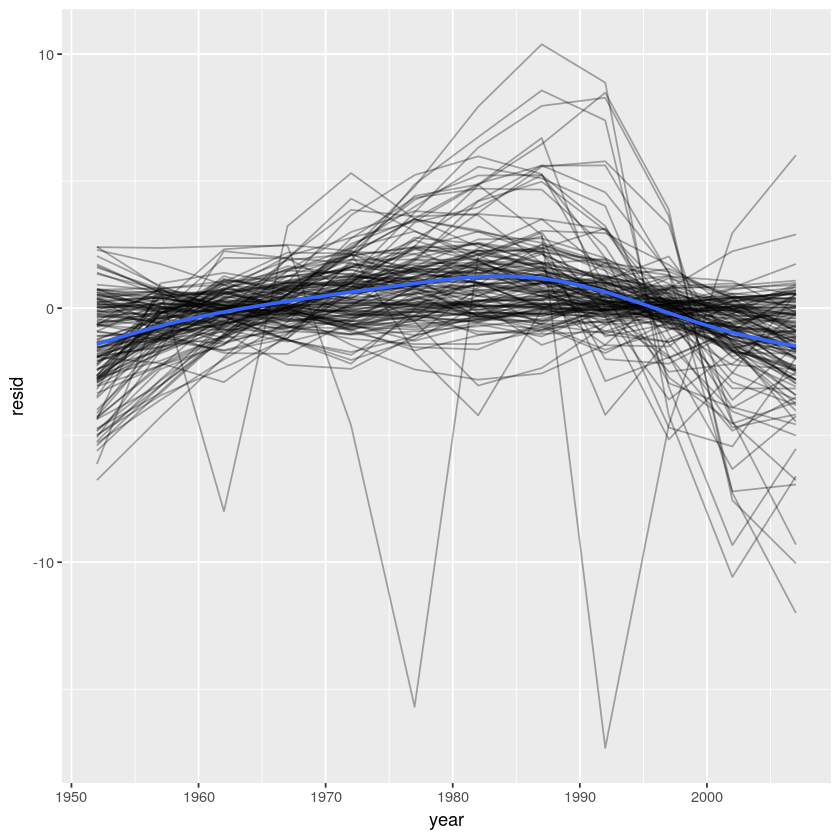

In [130]:
resids %>% 
  ggplot(aes(year, resid)) +
    geom_line(aes(group = country), alpha = 1 / 3) + 
    geom_smooth(se = FALSE)
#> `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

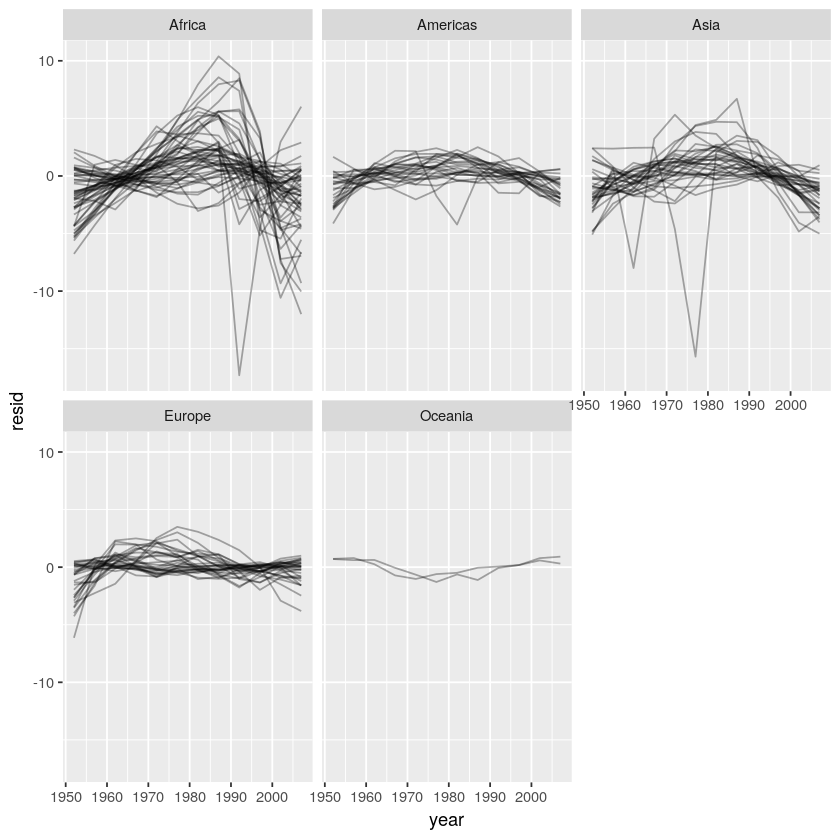

In [131]:
resids %>% 
  ggplot(aes(year, resid, group = country)) +
    geom_line(alpha = 1 / 3) + 
    facet_wrap(~continent)

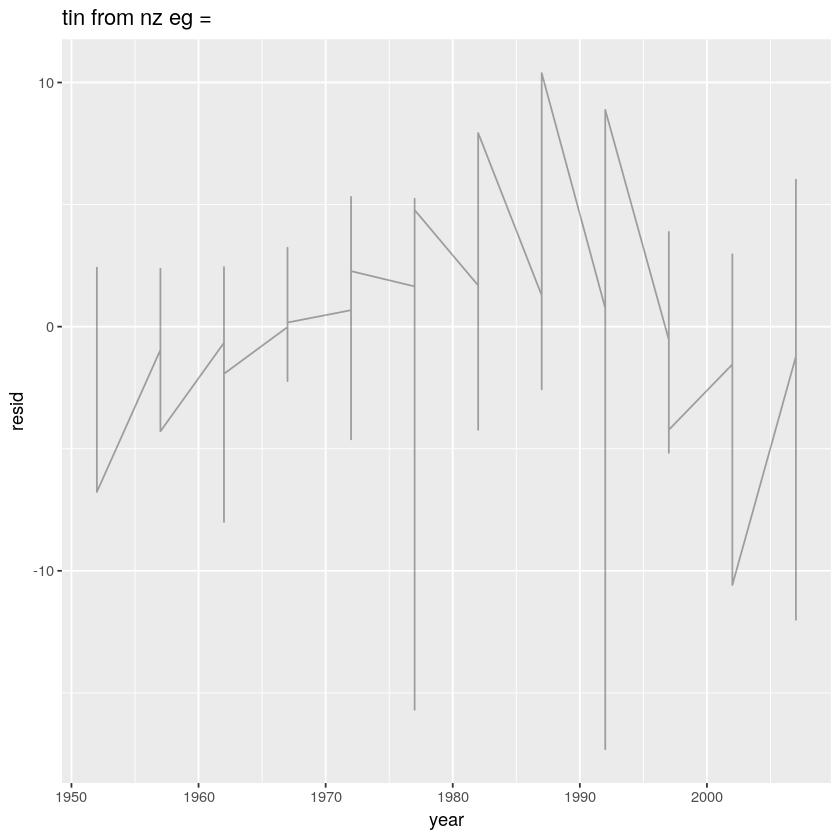

In [134]:
## puzzled...
resids %>% 
  ggplot(aes(year, resid)) + 
  geom_line(alpha=1/3) +               
  ggtitle("tin from nz eg = ")


// tin
// jupyter notebook doesnt show the S3 thing.
// it shows the (nested) df.  so in that regard nicer than Rstudio :D


```
S3 is part of R's object oriented systems. If you need more information, check [this section](http://adv-r.had.co.nz/S3.html) in Hadley's Advanced R out.

## Unnest 

`glance()` function from `broom` package inspects the quality of a statistical model.

**Additional tips**

- `broom::glance(model)`: for evaluating model quality and/or complexity 
- `broom::tidy(model)`: for extracting each coefficient in the model (the estimates + its variability)
- `broom::augment(model, data)`: for getting extra values (residuals, and influence statistics)

In [135]:
## xref  https://r4ds.had.co.nz/many-models.html#model-quality

In [92]:
glanced <- nested %>%
  mutate(glance = map(models, broom::glance))

glanced$glance[[1]]


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9477123,0.9424835,1.222788,181.2494,9.835213e-08,1,-18.34693,42.69387,44.14859,14.9521,10,12


In [ ]:
## nested$data[[1]] ## ??

In [125]:

glanced %>% 
  unnest(glance) %>%
  arrange(BIC)   %>%     # Low to High; Lower BIC indicates a better model fit    
  head(1)



country,continent,data,models,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<fct>,<fct>,<list>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
Sweden,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 71.860, 72.490, 73.370, 74.160, 74.720, 75.440, 76.420, 77.190, 78.160, 79.390, 80.040, 80.884, 7124673.000, 7363802.000, 7561588.000, 7867931.000, 8122293.000, 8251648.000, 8325260.000, 8421403.000, 8718867.000, 8897619.000, 8954175.000, 9031088.000, 8527.845, 9911.878, 12329.442, 15258.297, 17832.025, 18855.725, 20667.381, 23586.929, 23880.017, 25266.595, 29341.631, 33859.748","-252.9239, 0.1662545, 0.255, 0.05372727, 0.1024545, 0.06118182, -0.2100909, -0.3213636, -0.1726364, -0.2339091, -0.09518182, 0.3035455, 0.1222727, 0.135, -263.8849, 9.940576, 0.04583789, 0.004342185, -0.2671535, -0.3786492, -0.2301449, -0.2916406, -0.1531363, 0.245368, 0.06387226, 0.07637656, 2, 71.605, 72.43627, 73.26755, 74.09882, 74.93009, 75.76136, 76.59264, 77.42391, 78.25518, 79.08645, 79.91773, 80.749, 0, 1, -3.464102, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, 0.2886751, -6857.189, 59.7913, 0.1896554, 0.1060312, 0.02240704, -0.06121716, -0.1448414, -0.2284656, -0.3120898, -0.395714, -0.4793382, -0.5629624, 1.288675, 1.27328, 1, 2, 1e-07, 2, 10, lm(formula = lifeExp ~ year, data = df), lifeExp ~ year, 71.86, 72.49, 73.37, 74.16, 74.72, 75.44, 76.42, 77.19, 78.16, 79.39, 80.04, 80.884, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007",0.9954822,0.9950304,0.2117679,2203.449,4.640583e-13,1,2.693841,0.6123182,2.067038,0.4484564,10,12


In [163]:
book.eg <- glanced %>% 
  unnest(glance, .drop=TRUE) %>%   # .drop no longer honored
  arrange(BIC)     # Low to High; Lower BIC indicates a better model fit  

## book.eg %>%  head(1)

book.eg = glanced %>% 
  unnest(glance) %>% 
  ##select(where(is.numeric) %>%   ## regression in R 4.0 re-implementation ?
  select(country,continent,r.squared, AIC, BIC, p.value, logLik) %>%
  arrange(BIC)     

book.eg %>%  head(3)


country,continent,r.squared,AIC,BIC,p.value,logLik
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sweden,Europe,0.9954822,0.6123182,2.067038,4.640583e-13,2.693841
Switzerland,Europe,0.9973909,0.9659670,2.420687,2.978930e-14,2.517016
France,Europe,0.9976246,1.5327108,2.987431,1.863068e-14,2.233645


In [176]:
#### ch 25.2.4
book.eg %>%   arrange(r.squared)   %>% head(9) 
book.eg %>%   arrange(r.squared)   %>% tail(5)

country,continent,r.squared,AIC,BIC,p.value,logLik
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rwanda,Africa,0.01715964,83.00411,84.45883,0.68489269,-38.50205
Botswana,Africa,0.03402340,81.31346,82.76818,0.56604135,-37.65673
Zimbabwe,Africa,0.05623196,85.26271,86.71743,0.45802898,-39.63135
Zambia,Africa,0.05983644,74.11717,75.57189,0.44353178,-34.05859
Swaziland,Africa,0.06821087,83.31614,84.77086,0.41225300,-38.65807
Lesotho,Africa,0.08485635,80.60316,82.05788,0.35828637,-37.30158
Cote d'Ivoire,Africa,0.28337240,70.68707,72.14179,0.07480350,-32.34353
South Africa,Africa,0.31246865,75.23360,76.68832,0.05883744,-34.61680
Uganda,Africa,0.34215382,65.68962,67.14434,0.04573928,-29.84481


country,continent,r.squared,AIC,BIC,p.value,logLik
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pakistan,Asia,0.9972497,16.051071,17.505791,3.877363e-14,-5.025535
Switzerland,Europe,0.9973909,0.965967,2.420687,2.978930e-14,2.517016
France,Europe,0.9976246,1.532711,2.987431,1.863068e-14,2.233645
Mauritania,Africa,0.9976743,16.323425,17.778145,1.676077e-14,-5.161712
Brazil,Americas,0.9980474,10.983434,12.438154,6.990433e-15,-2.491717


In [142]:
glanced %>% 
  unnest(glance) %>%
  ggplot(aes(continent, BIC)) +
    geom_jitter(width = 0.5)

ERROR: Error in eval(lhs, parent, parent): object 'book.eg' not found


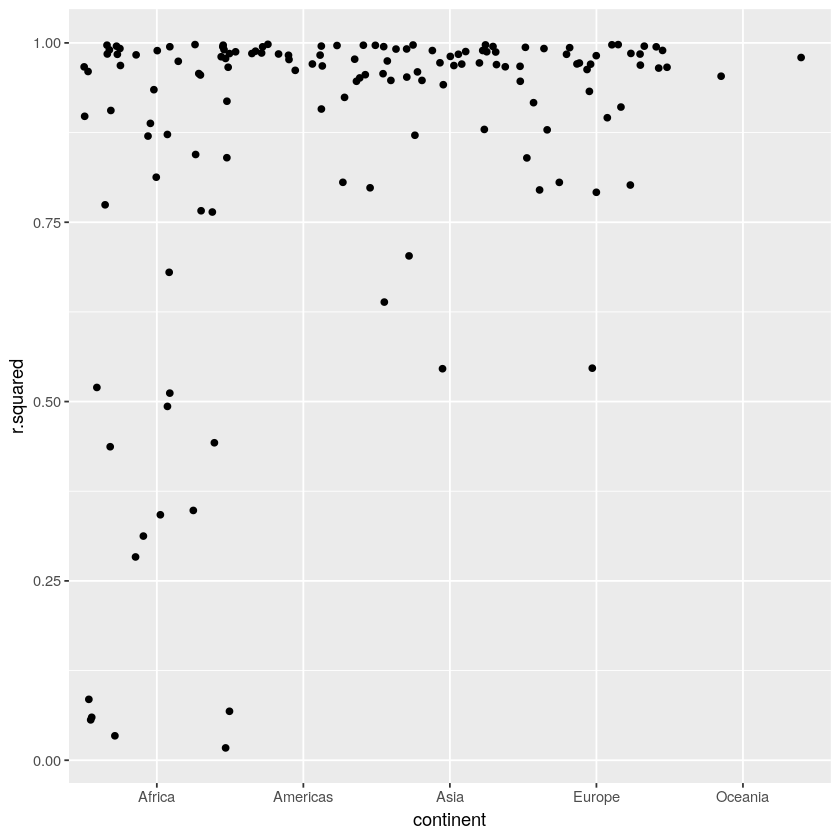

In [171]:
book.eg %>% 
  ggplot(aes(continent, r.squared)) + 
    geom_jitter(width = 0.5)

[1] 6

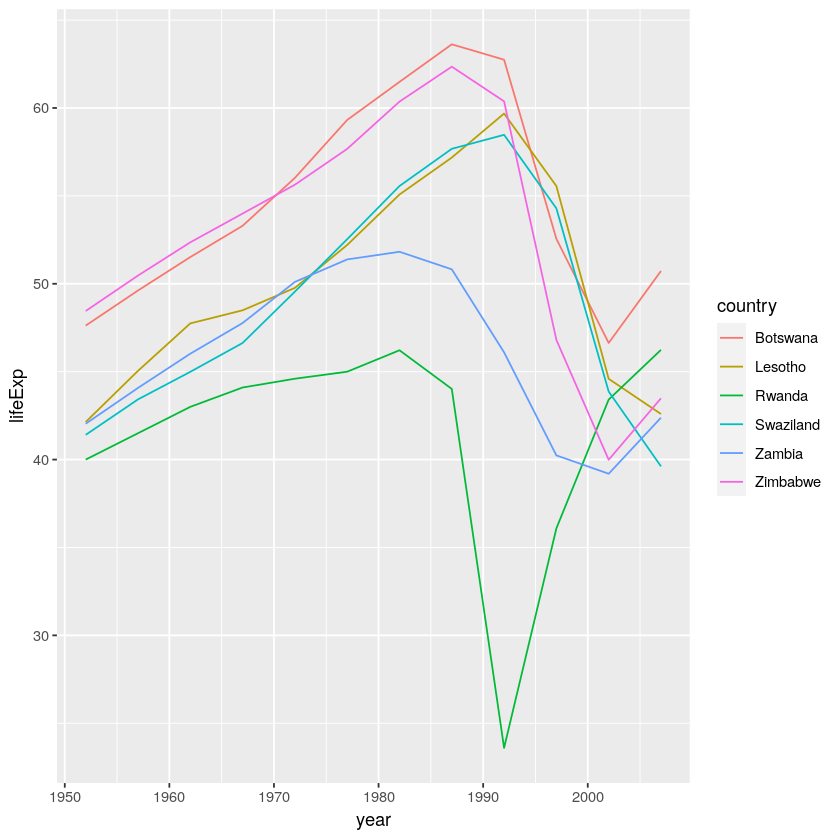

In [174]:
glance = book.eg
bad_fit <- filter(glance, r.squared < 0.25)
bad_fit %>% nrow

gapminder %>% 
  semi_join(bad_fit, by = "country") %>% 
  ggplot(aes(year, lifeExp, colour = country)) +
    geom_line()

In [ ]:
# ?broom::glance.lm

In [ ]:
## ch 25.2 of r4ds book

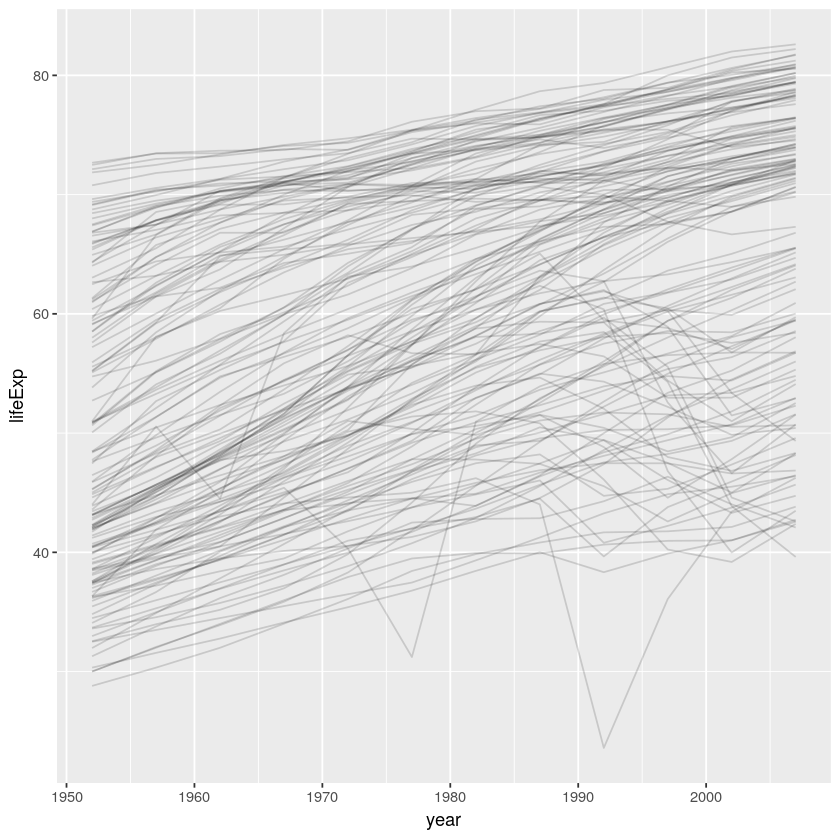

In [108]:
gapminder %>% 
  ggplot(aes(year, lifeExp, group = country)) +
    geom_line(alpha = 0.15)

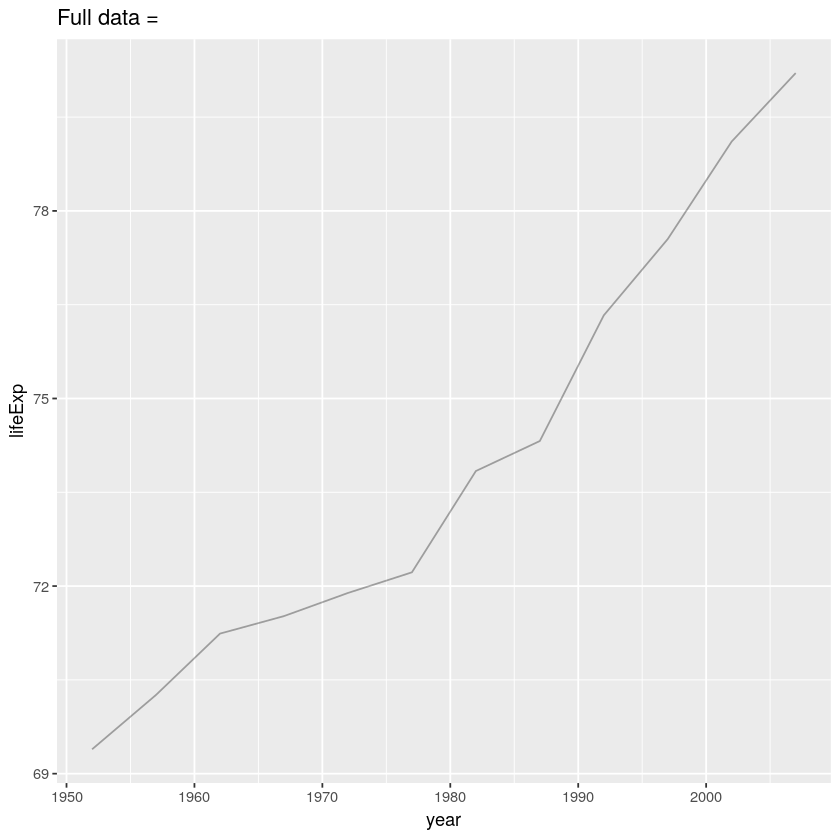

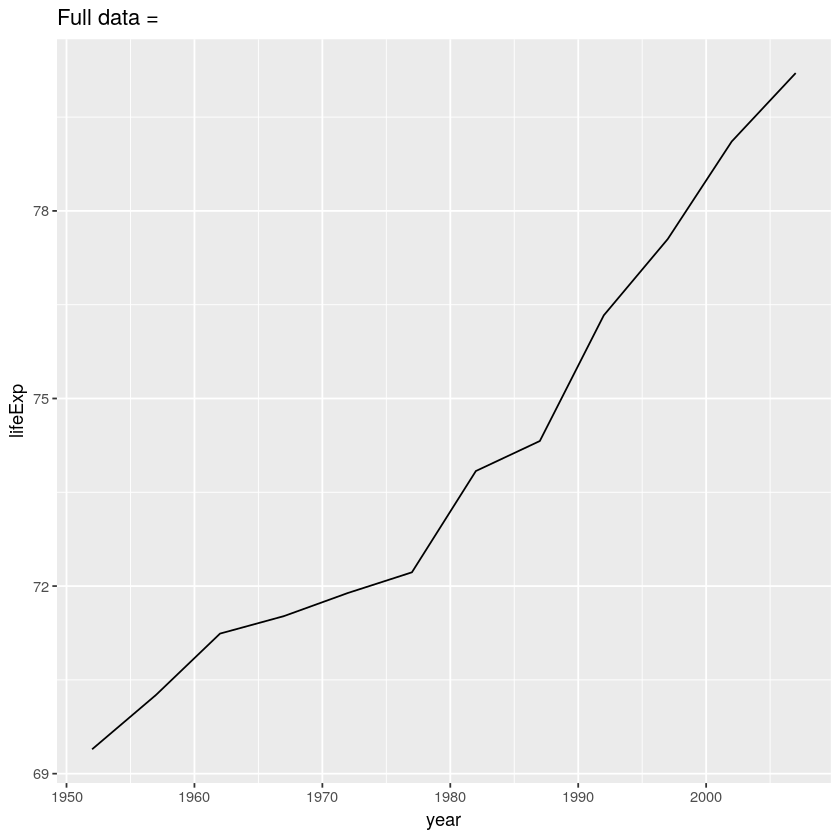

In [105]:
nz <- filter(gapminder, country == "New Zealand")
nz %>% 
  ggplot(aes(year, lifeExp)) + 
  geom_line(alpha=1/3) +                ## alpha is transparency?  set to 33% to make them lighther, not fully cover other lines
  ggtitle("Full data = ")

nz %>% 
  ggplot(aes(year, lifeExp)) + 
  geom_line() + 
  ggtitle("Full data = ")

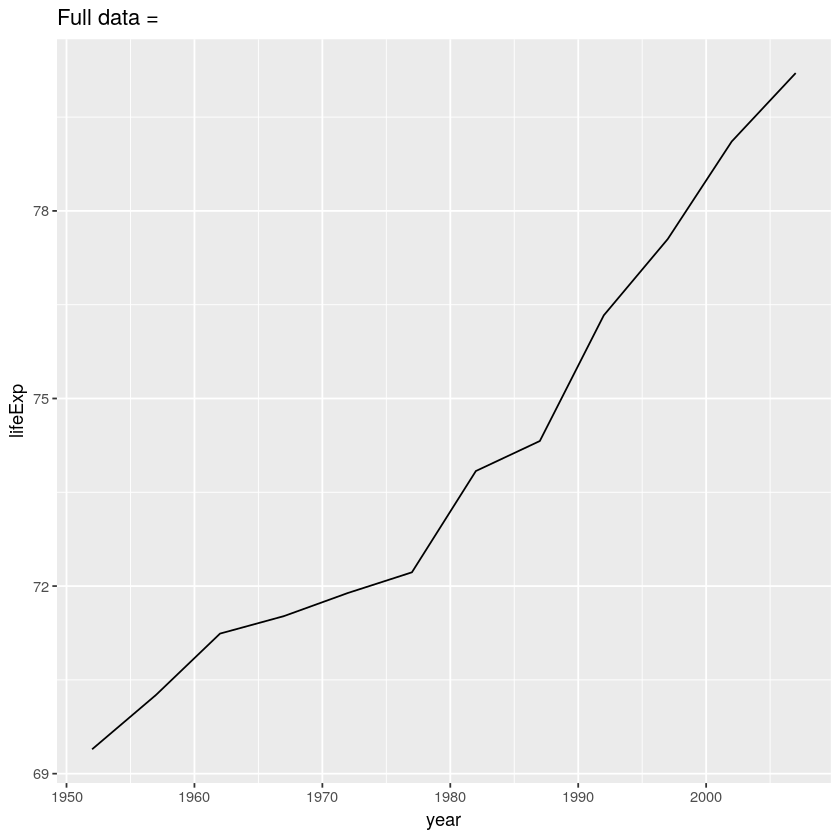

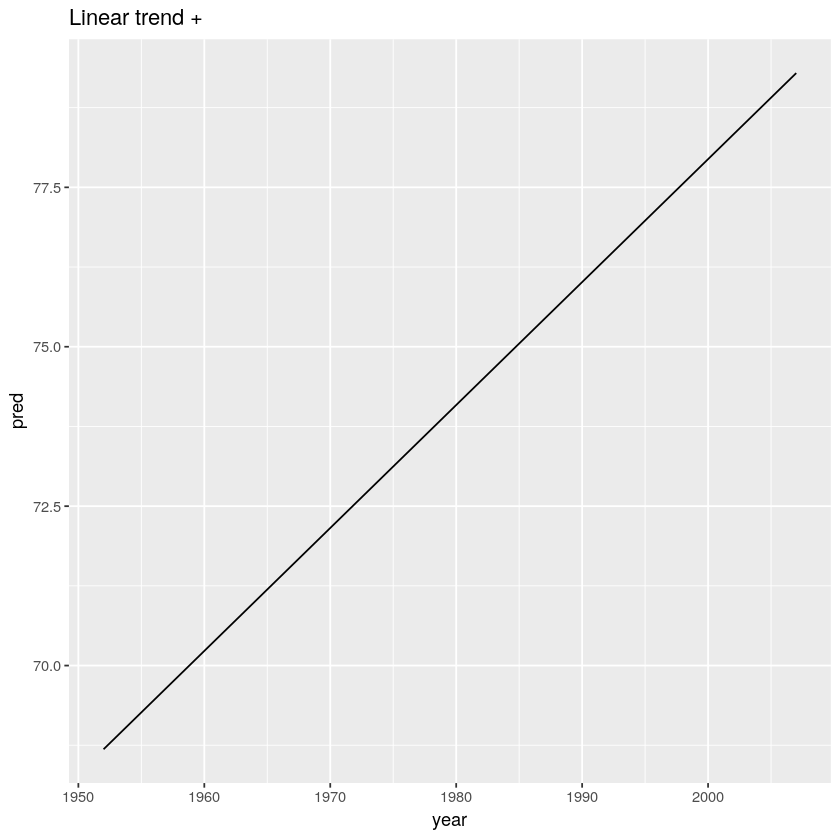

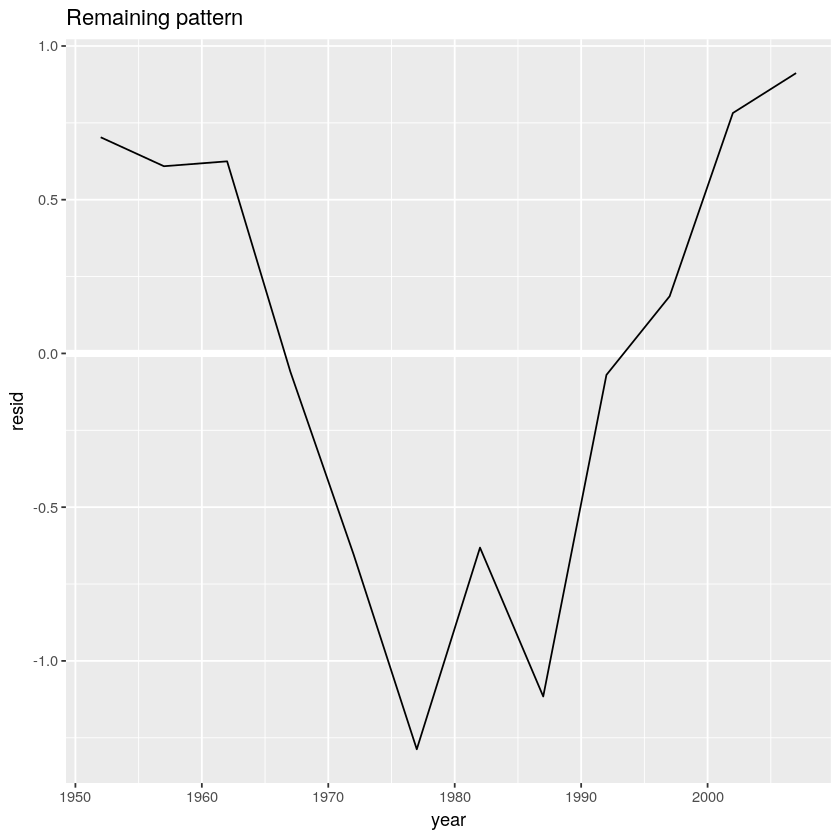

In [117]:
nz <- filter(gapminder, country == "New Zealand")
#nz %>% 
  ggplot(nz, aes(year, lifeExp)) + 
  geom_line() + 
  ggtitle("Full data = ")

nz_mod <- lm(lifeExp ~ year, data = nz)
#nz %>% 
  #add_predictions(nz, nz_mod) %>%
  ggplot( add_predictions(nz, nz_mod), aes(year, pred)) + ## ggplot(nz, aes(year, lifeExp)) + 
  geom_line() + 
  ggtitle("Linear trend + ")

nz %>% 
  add_residuals(nz_mod) %>% 
  ggplot(aes(year, resid)) + 
  geom_hline(yintercept = 0, colour = "white", size = 2) + 
  geom_line() + 
  ggtitle("Remaining pattern")

In [136]:
#### 25.2.4 of r4ds


In [137]:
broom::glance(nz_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9535846,0.9489431,0.8043472,205.4459,5.407324e-08,1,-13.32064,32.64128,34.096,6.469743,10,12


In [177]:
## xref    ~/tin-gh/inet-dev-class/notes ^**>  vi 2020.1023.RdataWrangleDay2.rst


In [178]:
## read:  tibble vs tripple   ;  mutate() (from dyplr?)


In [179]:
## ++ place pointer in R.html ++

## named list, enframe

x <- list(
  a = 1:5,
  b = 3:4, 
  c = 5:6
) 

df <- enframe(x)
df
#> # A tibble: 3 x 2
#>   name  value    
#>   <chr> <list>   
#> 1 a     <int [5]>
#> 2 b     <int [2]>
#> 3 c     <int [2]>

name,value
<chr>,<list>
a,"1, 2, 3, 4, 5"
b,"3, 4"
c,"5, 6"
